In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
cp_df = pd.merge(m_df,ct_df,how='outer')

drugs = ['Capomulin','Infubinol','Ketapril','Placebo']

# Display the data table for preview
cp_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gb1 = cp_df.groupby(['Drug','Timepoint'])
gb1_agg = gb1.agg({
    'Tumor Volume (mm3)':['mean']
})

# Convert to DataFrame
mv_bdt = pd.DataFrame(gb1_agg)
# Preview DataFrame
mv_bdt.head()

Tumor Volume (mm3)
                                  mean
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
gb2 = cp_df.groupby(['Drug','Timepoint'])
gb2_agg = gb2.agg({
    'Tumor Volume (mm3)':['sem']
})
# Convert to DataFrame
sem_gdt = pd.DataFrame(gb2_agg)
# Preview DataFrame
sem_gdt.head()



Tumor Volume (mm3)
                                   sem
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.448593
          10                  0.702684
          15                  0.838617
          20                  0.909731

In [22]:
# Minor Data Munging to Re-Format the Data Frames
df3 = pd.pivot_table(mv_bdt,index='Timepoint',columns='Drug')
df4 = pd.pivot_table(sem_gdt,index='Timepoint',columns='Drug')

df3.columns = df3.columns.droplevel()
df3.columns = df3.columns.droplevel()

df4.columns = df4.columns.droplevel()
df4.columns = df4.columns.droplevel()
# Preview that Reformatting worked
df3.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


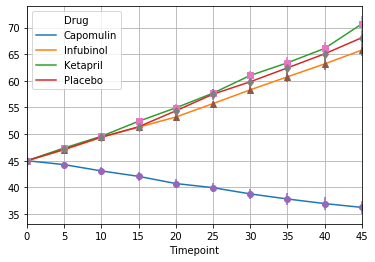

In [43]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(2,sharex=True)

df3.plot.line(y=df3.columns[:5],ax=ax[0])
df3.plot.line(y=df3.columns[5:],ax=ax[1],xlim=(-2,45))
forms = ['o','^','s','d','2']
count = 0
for i in df3.columns:
    if count < 5:
        ax[0].errorbar(df4.index.values.tolist(),df3[i],df4[i],fmt=forms[count%5])
    else:
        ax[1].errorbar(df4.index.values.tolist(),df3[i],df4[i],fmt=forms[count%5])
    count+=1

ax[0].grid()
ax[1].grid()
ax[0].grid()
ax[1].grid()

fig.set_size_inches(7,10)

# Save the Figure
#plt.savefig('../Figures/treatment_response_graphs1.png')

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
gb1_agg3 = gb1.agg({
    'Metastatic Sites':['mean']
})

# Convert to DataFrame
df5 = pd.DataFrame(gb1_agg3)
# Preview DataFrame
df5.head()

Metastatic Sites
                                mean
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.160000
          10                0.320000
          15                0.375000
          20                0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
gb1_agg4 = gb1.agg({
    'Metastatic Sites':['sem']
})
# Convert to DataFrame
df6 = pd.DataFrame(gb1_agg4)
# Preview DataFrame
df6.head()

Metastatic Sites
                                 sem
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.074833
          10                0.125433
          15                0.132048
          20                0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
df5 = pd.pivot_table(df5,index='Timepoint',columns='Drug')
df6 = pd.pivot_table(df6,index='Timepoint',columns='Drug')

df5.columns = df5.columns.droplevel()
df5.columns = df5.columns.droplevel()

df6.columns = df6.columns.droplevel()
df6.columns = df6.columns.droplevel()
# Preview that Reformatting worked
df5.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


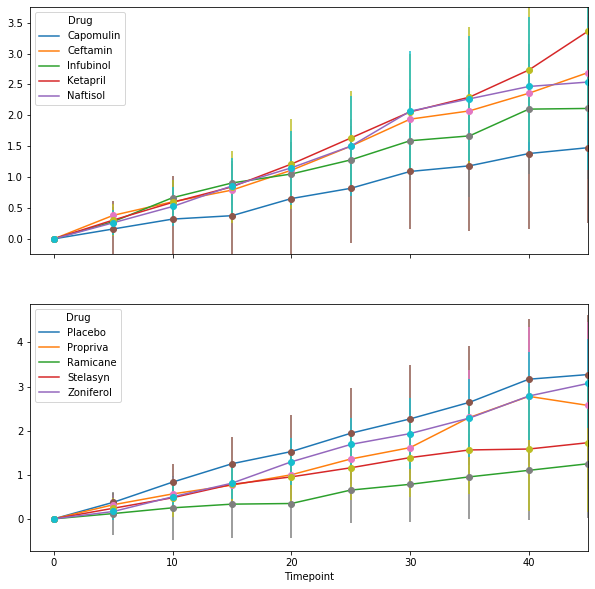

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(2,sharex=True)

df5.plot.line(y=df3.columns[:5],ax=ax[0],ylim=(-.25,3.75))
df5.plot.line(y=df3.columns[5:],ax=ax[1],xlim=(-2,45))

count = 0
for i in df3.columns:
    if count < 5:
        ax[0].errorbar(df6.index.values.tolist(),df5[i],df4[i],fmt='o')
    else:
        ax[1].errorbar(df6.index.values.tolist(),df5[i],df4[i],fmt='o')
    count+=1

ax[0].grid()
ax[1].grid()
ax[0].grid()
ax[1].grid()

fig.set_size_inches(10,10)
# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gb1_agg5 = gb1.agg({
    'Mouse ID':['count']
})
# Convert to DataFrame
df7 = pd.DataFrame(gb1_agg5)
df7.reset_index()
df7.columns = df7.columns.droplevel()
#df7.index = range(0,100)
# Preview DataFrame
df7.head()

count
Drug      Timepoint       
Capomulin 0             25
          5             25
          10            25
          15            24
          20            23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
df7 = pd.pivot_table(df7,index='Timepoint',columns='Drug')

df7.columns = df7.columns.droplevel()

# Preview the Data Frame
df7.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
def percent(i):
    max = i.values[0]
    arr = []
    for x in i.values:
        perc = (x/max)
        arr.append(perc)
    arr = list(map(lambda x:x*100, arr))
    return arr

In [15]:
df7_percent = df7.apply(percent)

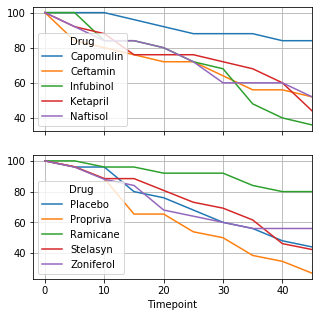

In [16]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(2,1,sharex=True)

df7_percent.plot.line(y=df7.columns[:5],ax=ax[0])
df7_percent.plot.line(y=df7.columns[5:],ax=ax[1],xlim=(-2,45))

ax[0].grid()
ax[1].grid()

fig.set_size_inches(5,5)
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
df3_percent = df3.apply(percent)


# Display the data to confirm
df3_percent.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,98.369081,103.340113,104.582225,105.309277,103.991329,104.723532,104.997705,97.655243,105.616559,104.115152
10,95.742868,107.300278,109.786463,110.182820,108.209355,109.829621,109.114535,94.515461,109.919653,108.199737
15,93.476261,111.320122,113.991992,116.444386,113.184485,114.132759,113.482930,92.211246,114.509797,112.842353
20,90.480723,115.904552,118.217091,122.046522,119.209083,120.809816,118.548305,89.418500,120.149766,118.156297


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()